## HOMEWORK 3 - Keypoint Filtering

#### FUNCTIONS FROM HOMEWORK 2

In [43]:
"""
Name: Dylan Ho
Matriculation Number: A0109251N
Date: 27/9/2016
"""
from skimage import color
import numpy as np
import scipy.misc
import scipy.ndimage.filters
import scipy.stats as st
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (15.0, 7.5)

image = color.rgb2gray(scipy.misc.imread('xwing.jpg'))
image = scipy.misc.imresize(image, (image.shape[0],image.shape[1]) )
every2 = scipy.misc.imresize(image, (image.shape[0]/2,image.shape[1]/2) )
every4 = scipy.misc.imresize(image, (image.shape[0]/4,image.shape[1]/4) )
#scipy.misc.imsave('outGray.jpg', image)
#every2 = image[::4,::4].copy()
#scipy.misc.imsave('outEvery2.jpg', every2)
#every4 = every2[::4,::4].copy()
#scipy.misc.imsave('outEvery4.jpg', every4)

#convolve each level's image with 5 different Gaussian kernel
scaleBottom = []
scaleMiddle = []
scaleTop = []

for i in range(1,6): #sigma 1-5
    b = scipy.ndimage.filters.gaussian_filter(image, float(i)*2 ** (1.0/5.0))
    m = scipy.ndimage.filters.gaussian_filter(every2, float(i)*2 ** (1.0/5.0))
    t = scipy.ndimage.filters.gaussian_filter(every4, float(i)*2 ** (1.0/5.0))
    
    scaleBottom.append(b)
    scaleMiddle.append(m)
    scaleTop.append(t)
    
DoG1 = []
DoG2 = []
DoG3 = []
for i in range(4):
    DoG1.append(scaleBottom[i+1] - scaleBottom[i])
    DoG2.append(scaleMiddle[i+1] - scaleMiddle[i])
    DoG3.append(scaleTop[i+1] - scaleTop[i])
    
def compare_with_neighbors (input_DoG, layer, y, x):
    """
    Checks if the element in the DoG layer is a local maximum or minimum
    
    Args:
        input_DoG : list of 4 2-dimensional np.arrays
            4 layers of DoGs
        layer, x, y:
            position to check in the input_DoG
            
    Idea:
        Compare with element at layer-1,y-1,x-1. 
        If higher, compare with all elements - must be higher than all
        Else compare with all elements - must be lower than all
    """
    isLocalMaxima = input_DoG[layer][y][x] > input_DoG[layer-1][y-1][x-1]
    if isLocalMaxima:
        for dLayer in range(-1,2):
            for dy in range(-1,2):
                for dx in range(-1,2):
                    # Don't need to compare with layer-1,y-1,x-1 again
                    if dLayer==-1 and dy==-1 and dx==-1:
                        continue
                    # Don't need to compare with itself
                    if dLayer==0 and dy==0 and dx==0:
                        continue
                    if input_DoG[layer][y][x] > input_DoG[layer+dLayer][y+dy][x+dx]:
                        continue
                    else:
                        return False
        return True
    else:
        for dLayer in range(-1,2):
            for dy in range(-1,2):
                for dx in range(-1,2):
                    # Don't need to compare with layer-1,y-1,x-1 again
                    if dLayer==-1 and dy==-1 and dx==-1:
                        continue
                    # Don't need to compare with itself
                    if dLayer==0 and dy==0 and dx==0:
                        continue
                    if input_DoG[layer][y][x] < input_DoG[layer+dLayer][y+dy][x+dx]:
                        continue
                    else:
                        return False    
        return True

## John Reid's Homework 2 Code

In [51]:
def get_keypoints(i1, i2, i3):
    maxima = []
    
    # Scan the image, with an offset of 1 for each border
    for x in range(1, i2.shape[0] - 1):
        for y in range(1, i2.shape[1] - 1):
            if is_maximum(i1,i2, i3, x, y):
                maxima.append([x,y])
    
    # resize the output into lists of x and y co-ordinates
    x_vals = [item[1] for item in maxima]
    y_vals = [item[0] for item in maxima]
    return [x_vals, y_vals]

def is_maximum(i1, i2, i3, x, y):
    pix = i2[x,y]
    middle_maxima = []
    
    # Find the indices of the maximum point in each layer
    bottom_max = np.unravel_index(i1[x-1:x+2, y-1:y+2].argmax(), (3,3))
    middle_max = np.unravel_index(i2[x-1:x+2, y-1:y+2].argmax(), (3,3))
    top_max = np.unravel_index(i3[x-1:x+2, y-1:y+2].argmax(), (3,3))

    # Check the bottom, middle and top layers for maxima
    if i1[bottom_max] >= pix or i2[middle_max] > pix or i3[top_max] >= pix:
        return False
    
    # If pix is the maxima, check for duplicates 
    for i in range(0, 3):
        for j in range(0,3):
            if i2[x-1+i, y-1+j] == i2[middle_max]:
                middle_maxima.append([x-1+i, y-1+i])
    
    if len(middle_maxima) != 1:
        return False 
    else: 
        return True
    
def get_all_keypoints(pyramid):
    all_keypoints = [] # Initialize the output
    for l in pyramid: # Layers
        keypoint_level = [] 
        for i in xrange(1,len(l) - 1):
            keypoint_level.append(get_keypoints(l[i-1], l[i], l[i+1]))
        all_keypoints.append(keypoint_level)
        
    return all_keypoints

## My Homework 2 Code (unused)
### Doesn't produce very many keypoints


In [45]:
DoG1_x1 = []
DoG1_y1 = []
DoG1_x2 = []
DoG1_y2 = []

DoG2_x1 = []
DoG2_y1 = []
DoG2_x2 = []
DoG2_y2 = []

DoG3_x1 = []
DoG3_y1 = []
DoG3_x2 = []
DoG3_y2 = []

for y in range(1,len(DoG1[0])-1):
    for x in range(1,len(DoG1[0][0])-1):
        if (compare_with_neighbors(DoG1,1,y,x)):
            DoG1_x1.append(x)
            DoG1_y1.append(y)
        if (compare_with_neighbors(DoG1,2,y,x)):
            DoG1_x2.append(x)
            DoG1_y2.append(y)
            
for y in range(1,len(DoG2[0])-1):
    for x in range(1,len(DoG2[0][0])-1):
        if (compare_with_neighbors(DoG2,1,y,x)):
            DoG2_x1.append(x)
            DoG2_y1.append(y)
        if (compare_with_neighbors(DoG2,2,y,x)):
            DoG2_x2.append(x)
            DoG2_y2.append(y)
            
for y in range(1,len(DoG3[0])-1):
    for x in range(1,len(DoG3[0][0])-1):
        if (compare_with_neighbors(DoG3,1,y,x)):
            DoG3_x1.append(x)
            DoG3_y1.append(y)
        if (compare_with_neighbors(DoG3,2,y,x)):
            DoG3_x2.append(x)
            DoG3_y2.append(y)
            
#plt.imshow(image, cmap = "Greys_r")
#plt.scatter(DoG1_x1,DoG1_y1, color = "yellow", marker = "+")
#plt.show()

In [52]:
(DoG1_x1,DoG1_y1) = get_keypoints(DoG1[0], DoG1[1], DoG1[2])
(DoG1_x2,DoG1_y2) = get_keypoints(DoG1[1], DoG1[2], DoG1[3])
(DoG2_x1,DoG2_y1) = get_keypoints(DoG2[0], DoG2[1], DoG2[2])
(DoG2_x2,DoG2_y2) = get_keypoints(DoG2[1], DoG2[2], DoG2[3])
(DoG3_x1,DoG3_y1) = get_keypoints(DoG3[0], DoG3[1], DoG3[2])
(DoG3_x2,DoG3_y2) = get_keypoints(DoG3[1], DoG3[2], DoG3[3])

1663


### ORIGINAL UNFILTERED IMAGES

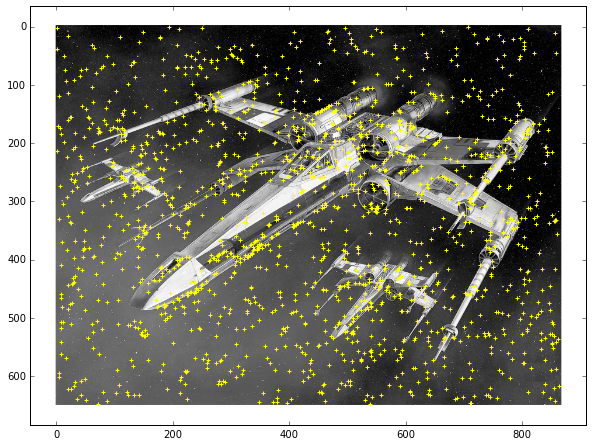

In [47]:
plt.imshow(image, cmap = "Greys_r")
plt.scatter(DoG1_x1,DoG1_y1, color = "yellow", marker = "+")
plt.show()

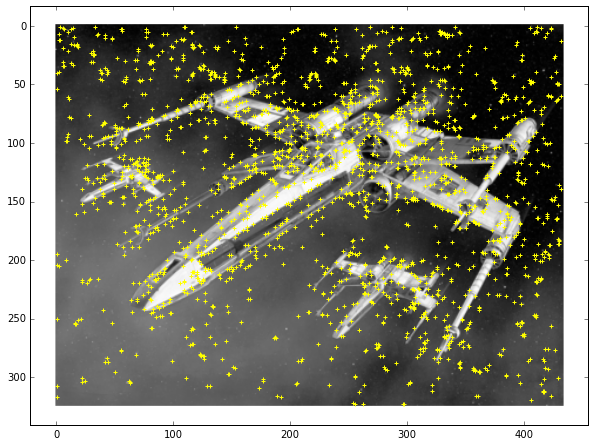

In [72]:
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(DoG2_x1, DoG2_y1, color = "yellow", marker = "+")
plt.show()

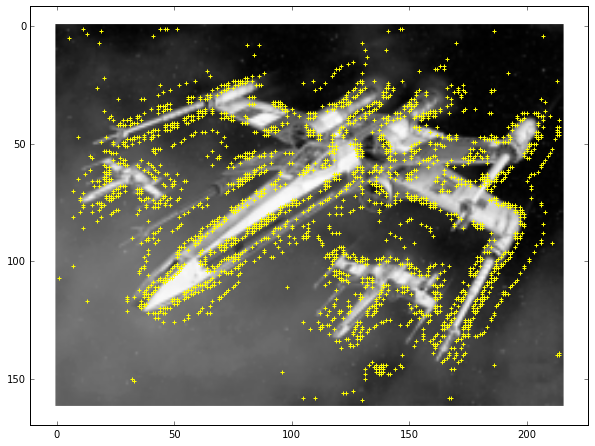

In [58]:
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(DoG3_x2, DoG3_y2, color = "yellow", marker = "+")
plt.show()

In [75]:
def derivX (inArray, inX, inY):
    #if it is the last x index, we cannot compute x deriv
    if (inX >= len(inArray[0])-1):
        raise NameError('Last x index')
    return inArray[inY][inX+1]-inArray[inY][inX]

def derivY (inArray, inX, inY):
    if (inY >= len(inArray)-1):
        raise NameError('Last y index')
    return inArray[inY+1][inX]-inArray[inY][inX]

def derivXX (inArray, inX, inY):
    if (inX >= len(inArray[0])-2):
        raise NameError('Last xx index')
    return inArray[inY][inX+2]-2*inArray[inY][inX+1]+inArray[inY][inX]

def derivXY (inArray, inX, inY):
    if (inX >= len(inArray[0])-1 or inY >= len(inArray)-1):
        raise NameError('Last xy index')
    return inArray[inY+1][inX+1]-inArray[inY][inX+1]-inArray[inY+1][inX]+inArray[inY][inX]

def derivYY (inArray, inX, inY):
    if (inY >= len(inArray)-2):
        raise NameError('Last yy index')
    return inArray[inY+2][inX]-2*inArray[inY+1][inX]+inArray[inY][inX]

def hessianMatrix (inArray, inX, inY):
    hessianMatrix = np.array([[derivXX(inArray,inX,inY),derivXY(inArray,inX,inY)],
                              [derivXY(inArray,inX,inY),derivYY(inArray,inX,inY)]])
    return hessianMatrix

def directionVector (inArray, inX, inY):
    hess = hessianMatrix(inArray,inX,inY)
    inverseHess = np.linalg.inv(hess)
    column = np.array([[derivX(inArray,inX,inY)],[derivY(inArray,inX,inY)]])
    finalVec = -np.dot(inverseHess,column)
    return finalVec

def getShift (v):
    """
    Gets the correct shift from a vector
    
    Args:
        v : any 2 x 1 vector
            
    Idea:
        Takes any vector and checks what cardinal direction that vector is pointing to. 
        Returns one of the eight cardinal directions
        x = {-1,0,1}
        y = {-1,0,1} except x,y=(0,0)
    """
    angle = np.arctan2(v[1],v[0]) * 180 / np.pi
    quadrant = angle // (180.0/8.0)
        
    shift = []
    if quadrant == 0:
        #shift = np.array([[1],[0]])
        shift = [1,0]
    elif quadrant == 1 or quadrant == 2:
        #shift = np.array([[1],[1]])
        shift = [1,1]
    elif quadrant == 3 or quadrant == 4:
        #shift = np.array([[0],[1]])
        shift = [0,1]
    elif quadrant == 5 or quadrant == 6:
        #shift = np.array([[-1],[1]])
        shift = [-1,1]
    elif quadrant == 7 or quadrant == -7:
        #shift = np.array([[-1],[0]])
        shift = [-1,0]
    elif quadrant == -8 or quadrant == -6 or quadrant == -5:
        #shift = np.array([[-1],[-1]])
        shift = [-1,-1]
    elif quadrant == -4 or quadrant == -3:
        #shift = np.array([[0],[-1]])
        shift = [0,-1]
    elif quadrant == -2 or quadrant == -1:
        #shift = np.array([[1],[-1]])
        shift = [1,-1]
    else:
        print quadrant
        raise NameError('Strange quadrant')
    return shift

def traceSquaredOverDet (inArray, inX, inY):
    XX = derivXX(inArray,inX,inY)
    XY = derivXY(inArray,inX,inY)
    YY = derivYY(inArray,inX,inY)
    trace = XX + YY
    det = XX*YY - XY*XY
    return trace**2/det

def filterOutBad (inArray, inListX, inListY):
    correctX = []
    correctY = []
    wrongX = []
    wrongY = []
    for x,y in zip(inListX,inListY):
        try:
            v = directionVector(inArray,x,y)
        except np.linalg.LinAlgError:
            #print("SINGULAR MATRIX")
            continue
        except NameError:
            continue
        if np.linalg.norm(v) > 0.5:
            shift = getShift(v)
            val = inArray[y][x]+derivX(inArray,x,y)*v[0]+derivY(inArray,x,y)*v[1]
            if val >= 0.03:
                try:
                    val2 = traceSquaredOverDet(inArray,x+shift[0],y+shift[1])
                except NameError:
                    continue
                if val2 < 12.1:
                    correctX.append(x+shift[0])
                    correctY.append(y+shift[1])
                else:
                    wrongX.append(x)
                    wrongY.append(y)
            else:
                wrongX.append(x)
                wrongY.append(y)

        else:
            if inArray[y][x] >= 0.03:
                val2 = traceSquaredOverDet(inArray,x,y)
                if val2 < 12.1:
                    correctX.append(x)
                    correctY.append(y)
                else:
                    wrongX.append(x)
                    wrongY.append(y)
            else:
                wrongX.append(x)
                wrongY.append(y)

    print "input",len(inListX)
    print "valid",len(correctX)
    print "invalid",len(wrongX)
    print "rest are singular matrices"
    
    return correctX,correctY,wrongX,wrongY

### FILTERED IMAGES
##### Many points have been removed!

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars


input 1663
valid 641
invalid 385
rest are singular matrices


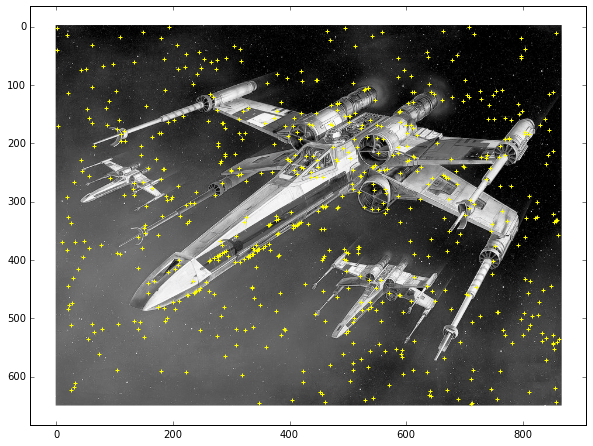

In [71]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG1[1],DoG1_x1,DoG1_y1)
plt.imshow(image, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars


input 780
valid 339
invalid 330
rest are singular matrices


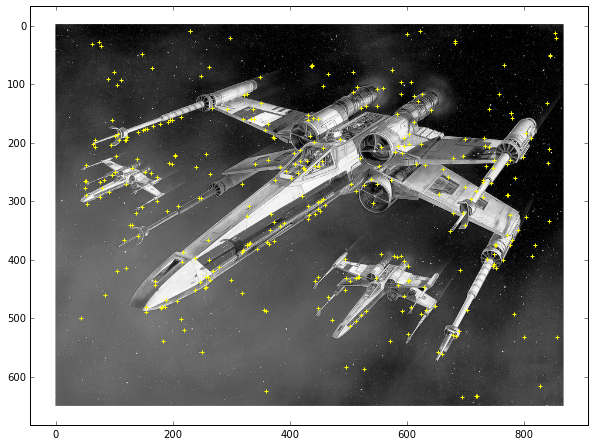

In [73]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG1[1],DoG1_x2,DoG1_y2)
plt.imshow(image, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars


input 2140
valid 812
invalid 520
rest are singular matrices


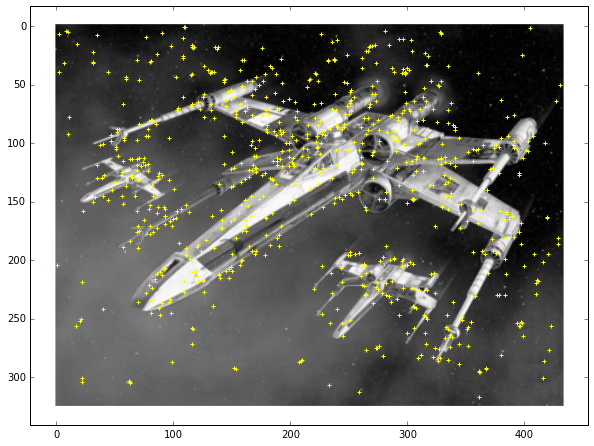

In [76]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG2[2],DoG2_x1,DoG2_y1)
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars


input 4687
valid 2103
invalid 1144
rest are singular matrices


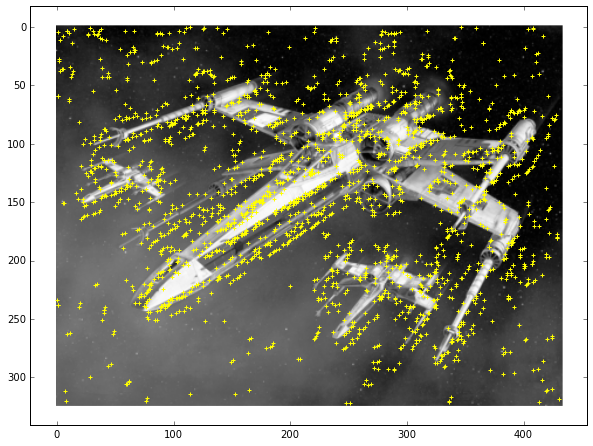

In [77]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG2[2],DoG2_x2,DoG2_y2)
plt.imshow(every2, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars


input 1407
valid 554
invalid 360
rest are singular matrices


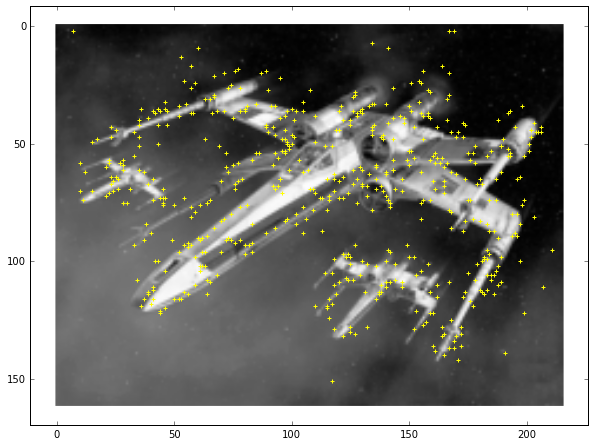

In [78]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG3[3],DoG3_x1,DoG3_y1)
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: RuntimeWarning: divide by zero encountered in long_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars


input 2163
valid 905
invalid 583
rest are singular matrices


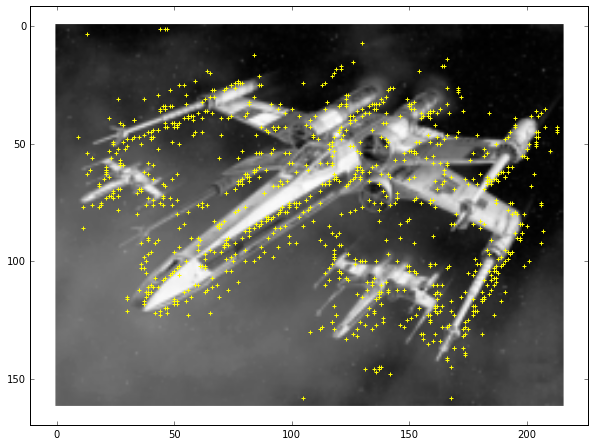

In [79]:
correctX,correctY,wrongX,wrongY = filterOutBad(DoG3[3],DoG3_x2,DoG3_y2)
plt.imshow(every4, cmap = "Greys_r")
plt.scatter(correctX,correctY, color = "yellow", marker = "+")
#plt.scatter(wrongX,wrongY, color = "red", marker = "+")
plt.show()